In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
import tensorflow
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')
import sklearn.metrics as metrics
import warnings



from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from xgboost import plot_importance
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
Child = pd.read_csv("/content/gdrive/My Drive/AI와 자연어처리를 활용한 아동재학대 선제 예방 서비스_LA/정형/데이터/Child_new4_score.csv",encoding = 'CP949')
Child

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,21,22,25,29,31,44,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,개별사건번호,피해아동대상자,학대행위자대상,아동_성별,아동_연령대,아동_내국인여부,아동_최종학력,아동_직업유형,아동_거주상태,아동_친권자유형,아동_가족유형,아동_다문화가족,아동_가구소득구분코,아동_기초생활수급유,아동_주요병력,아동_보호조치유형,신고_접수경로구분코,신고_접수일시,신고_신고자유형구분,신고_통보경찰소속기,신고_집단시설내사건,신고_재신고여부_1,신고_재신고유형,신고_재신고이전접수,신고_접수유형,신고_관할지구대,신고_신고접수구분,신고_접수자소속기관,신고_관할지역ID,신고_관련키워드,신고_피해아동상태구,신고_재신고센터ID,신고_관할지역기관I,신고_관리센터ID,신대_행위자아동관계,신대_아동동거여부,신대_접수유형,신대_재신고여부,신대_재신고유형_1,신대_재신고센터ID,...,아특_대소변문제,아특_가출,아특_주의산만,아조_아특_기타,아특_나태_무기력,아특_잦은병치례,아특_학습문제,아특_급만성질병,아특_경제적어려움,아특_부적절양육태도,아특_음주,아특_알콜남용,아특_배우자폭력,아특_흡연,아특_뇌병변장애,아특_잦은결석,아특_대인관계기피,아특_지적장애,아특_약물,아특_신장장애,아특_원치않는아동,아특_스트레스,아특_과잉행동,아특_전과력,아특_언어문제,아특_낮은자아존중감,아특_거짓말,아조_아특_기타.1,아조_분리조치,아조_사망,아조_원가정보호,아조_가정복귀,행조_아동과의분리,행조_만나지못함,행조_모니터링,행조_고소고발사건처,행조_사건처리만나지,New_Abuse_Count,New_재학대혐의여부,New_Call_Count
0,1.020100e+20,CASRCP20121010398,CASRCP20121020314,M,NaN,내국인,NaN,NaN,자택,양부모,입양가정,일반,250만원이상-300만원미만,비수급권대상,NaN,NaN,112,2014-12-31 22:00,비신고의무자,월계지구대,NaN,없음,NaN,NaN,아동학대 의심사례,NaN,경찰접수,서울동부,노원구,NaN,NaN,NaN,서울특별시동부아동보호전문기관,서울특별시동부아동보호전문기관,양모,동거,아동학대 의심사례,N,NaN,NaN,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.0
1,8.040800e+20,CASRCP20150110545,CASRCP20150120502,M,NaN,내국인,NaN,NaN,기타,친부모,친부모가정,일반,NaN,비수급권대상,NaN,NaN,112,2014-12-31 21:30,비신고의무자,고양경찰서,NaN,없음,NaN,NaN,아동학대 의심사례,NaN,경찰접수,경기고양,덕양구,NaN,NaN,NaN,경기고양아동보호전문기관,경기고양아동보호전문기관,친부,동거,아동학대 의심사례,N,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.0,N,0.0
2,4.020400e+20,CASRCP20141211229,CASRCP20141221114,M,NaN,내국인,NaN,NaN,NaN,친부,부자가족(이혼),일반,NaN,NaN,NaN,NaN,112,2014-12-31 19:06,비신고의무자,삼산경찰서,NaN,없음,NaN,NaN,아동학대 의심사례,NaN,경찰접수,인천북부,부평구,NaN,NaN,NaN,인천북부아동보호전문기관,인천북부아동보호전문기관,친조모,동거,아동학대 의심사례,N,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.0
3,4.020400e+20,CASRCP20141211178,CASRCP20141221114,F,NaN,내국인,NaN,NaN,NaN,친부,부자가족(이혼),일반,NaN,NaN,NaN,NaN,112,2014-12-31 19:06,비신고의무자,삼산경찰서,NaN,없음,NaN,NaN,아동학대 의심사례,NaN,경찰접수,인천북부,부평구,NaN,NaN,NaN,인천북부아동보호전문기관,인천북부아동보호전문기관,친조모,동거,아동학대 의심사례,N,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.0
4,1.060800e+20,CASRCP20141211459,CASRCP20141221403,F,NaN,내국인,NaN,NaN,보증금(전세)+월세,친부모,친부모가정,일반,300만원이상,비수급권대상,NaN,NaN,112,2014-12-31 18:45,비신고의무자,고양경찰서 화전지구대,NaN,없음,NaN,NaN,아동학대 의심사례,NaN,경찰접수,경기고양,성북구,NaN,NaN,NaN,서울성북아동보호전문기관,서울성북아동보호전문기관,친모,동거,아동학대 의심사례,N,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122030,5.801580e+21,CASRCP20180100595,CASRCP20180100597,M,1~3세,내국인,NaN,어린이집,NaN,친모,모자가족(별거),일반,NaN,NaN,NaN,NaN,112,2018-01-01 6:50,비신고의무자,의정부경찰서,해당사항없음,NaN,NaN,NaN,아동학대 의심사례,가능 지구대,경찰접수,의정부경찰서,의정부시,NaN,NaN,NaN,경기북부아동보호전문기관,경기북부아동보호전문기관,기타,동거,아동학대 의심사례,N,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.0,N,0.0
122031,5.115510e+21,CASRCP20180100289,CASRCP20180100290,F,13~15세,내국인,재학중,초등학교,NaN,친모,모자가족(이혼),일반,NaN,NaN,NaN,NaN,112,2018-01-01 0:40,비신고의무자,부산기장경찰서,해당사항없음,NaN,NaN,NaN,아동학대 의심사례,기장 지구대,경찰접수,부산기장경찰서,기장군,NaN,NaN,NaN,부산동부아동보호전문기관,부산동부아동보호전문기관,친모,동거,아동학대 의심사례,N,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0.0,N,0.0
122032,6.404640e+21,CASRCP20180102065,CASRCP20180102067,F,NaN,NaN,NaN,NaN,NaN,친부모,친부모가정,NaN,NaN,NaN,NaN,NaN,112,2018-01-01 0:40,비신고의무자,구미경찰서,해당사항없음,NaN,NaN,NaN,아동학대 의심사례,인동 파출소,경찰접수,구미경찰서,구미시,NaN,NaN,NaN,경북서부아동보호전문기관,경북서부아동보호전문기관,친부,동거,아동학대 의심사례,N,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0.0
122033,5.715570e+21,CASRCP20180101264,CASRCP20180101266,M,1~3세,내국인,재학중,어린이집,NaN,친부모,친부모가정,일반,NaN,비수급권대상,NaN,NaN,112,2018-01-01 0:20,비신고의무자,안산단원경찰서,해당사항없음,NaN,NaN,NaN,아동학대

In [5]:
for i in range(len(Child.columns)):
    print(i, Child.columns[i])

0 개별사건번호
1 피해아동대상자
2 학대행위자대상
3 아동_성별
4 아동_연령대
5 아동_내국인여부
6 아동_최종학력
7 아동_직업유형
8 아동_거주상태
9 아동_친권자유형
10 아동_가족유형
11 아동_다문화가족
12 아동_가구소득구분코
13 아동_기초생활수급유
14 아동_주요병력
15 아동_보호조치유형
16 신고_접수경로구분코
17 신고_접수일시
18 신고_신고자유형구분
19 신고_통보경찰소속기
20 신고_집단시설내사건
21 신고_재신고여부_1
22 신고_재신고유형
23 신고_재신고이전접수
24 신고_접수유형
25 신고_관할지구대
26 신고_신고접수구분
27 신고_접수자소속기관
28 신고_관할지역ID
29 신고_관련키워드
30 신고_피해아동상태구
31 신고_재신고센터ID
32 신고_관할지역기관I
33 신고_관리센터ID
34 신대_행위자아동관계
35 신대_아동동거여부
36 신대_접수유형
37 신대_재신고여부
38 신대_재신고유형_1
39 신대_재신고센터ID
40 신대_재신고이전
41 신대_통계거점
42 신대_통계기관
43 신대_통계관할지역
44 조사_집단시설내사건
45 조사_조사완료여부
46 조사_관할지역ID_
47 조사_관할지역기관I
48 조사_위험_점수
49 조사_위험_유형
50 조대_재신고여부_1
51 조대_재신고유형구분
52 조대_재신고관리기관
53 조대_재신고이전사건
54 조대_동일신고여부
55 조대_아동동거여부
56 조대_특별관리유형
57 판단_학대혐의여부
58 판단_유형_신체
59 판단_유형_정서
60 판단_유형_성
61 판단_유형_방임
62 판단_유형_유기
63 판단_학대발생빈도
64 결과_조치결과일자
65 신고_접수연도
66 아특_장애의심
67 아특_신체질환및장애
68 아특_장루요루장애
69 아특_난작문
70 아특_애착문제
71 아특_탐식및결식
72 아특_시각장애
73 아특_신체발달지연
74 아특_부부및가족갈등
75 아특_종교문제
76 아특_어릴적학대경험
77 아특_특성없음
78 아특_공격성
79 아특_성격및기질문제
80 아특_정서문제
81

In [6]:
Child.columns[49]

'조사_위험_유형'

In [7]:
Child['조사_위험_유형'].unique()

array([nan, '03,09,08,07,04', '01,06,03', '01,06,05,03', '02,04',
       '03,09,05', '5', '01,07,03', '03,08,04', '1', '01,07', '01,06,05',
       '01,07,05', '01,09,03', '01,05,03', '03,05',
       '01,09,08,07,06,05,03,02', '01,06', '7', '02,08,07,04,03',
       '05,07,06', '01,07,06,05', '01,09,07,06,05,03', '3', '01,03',
       '01,07,05,03', '01,07,06,05,03', '01,09,07,04,03,02', '01,05',
       '08,09', '01,09,08,06,05,04,03,02', '03,08', '03,07',
       '01,08,07,05,03', '03,07,05', '01,05,04,03,02',
       '01,09,07,06,05,03,02', '01,09,08,06,05,03,02', '03,09', 3.0,
       '01,08,03', '01,09,05,03', '9', '01,09,06,05,03', '07,08',
       '03,09,06,05', '01,08,07', '02,07,03', '01,09', '03,06,05',
       '03,08,07', '01,09,07', '01,08,07,06,05,03', '01,08', '03,09,07',
       '05,09,06', '01,08,07,03', '03,09,07,05', '01,09,08,03',
       '01,07,04,03', '03,09,08,07', '01,08,06,05,03',
       '01,08,07,06,05,03,02', '8', '07,09,08', '05,06', '03,08,07,05',
       '01,08,05,03',

In [8]:
Child_score = Child['조사_위험_유형']
Child_score

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
122030            NaN
122031          01,03
122032    03,09,06,05
122033              7
122034              7
Name: 조사_위험_유형, Length: 122035, dtype: object

In [9]:
Child_score = Child_score.replace('1','01')
Child_score = Child_score.replace('2','02')
Child_score = Child_score.replace('3','03')
Child_score = Child_score.replace('4','04')
Child_score = Child_score.replace('5','05')
Child_score = Child_score.replace('6','06')
Child_score = Child_score.replace('7','07')
Child_score = Child_score.replace('8','08')
Child_score = Child_score.replace('9','09')
Child_score

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
122030            NaN
122031          01,03
122032    03,09,06,05
122033             07
122034             07
Name: 조사_위험_유형, Length: 122035, dtype: object

In [10]:
Child['조사_위험_유형'] = Child_score

In [11]:
Child['조사_위험_유형'].value_counts()

07             2382
03             2333
01,03          2273
01,05,03       1786
01,07,03       1382
               ... 
04,09,08,06       1
01,09,05,04       1
02,06,04          1
01,07,05,02       1
3.0               1
Name: 조사_위험_유형, Length: 422, dtype: int64

In [13]:
Child.to_csv('/content/gdrive/My Drive/AI와 자연어처리를 활용한 아동재학대 선제 예방 서비스_LA/정형/데이터/Child_new5.csv', encoding='cp949', index=False)

In [14]:
sc = []
count =0

for i in range(len(Child['조사_위험_유형'])):
    try:
        for j in range(len(Child['조사_위험_유형'][i].split(','))):
            sc.append(Child['조사_위험_유형'][i].split(',')[j])
    except AttributeError:
        sc.append(np.nan)
    count+=1
    
print(count)
print(len(sc))

122035
206645


In [15]:
sc

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [16]:
s = pd.Series(sc)    # 시리즈화
s.value_counts()     # 특성별 개수파악

03    30441
01    22461
07    18817
08    15079
05    14369
09    12895
06     6972
02     4148
04     3007
dtype: int64

In [18]:
sc_value = list(set(sc)) # sc의 구성요소가 무엇인지 뽑아내기
sc_value

[nan, '01', '08', '02', '07', '05', '04', '06', '09', '03']

In [19]:
# 위험도평가척도 항목을 각각 변수로 더미화시키기위해 DataFrame생성 
df_sc = pd.DataFrame(0,index=Child.index, columns=sc_value)
df_sc

,NaN,01,08,02,07,05,04,06,09,03
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
122030,0,0,0,0,0,0,0,0,0,0
122031,0,0,0,0,0,0,0,0,0,0
122032,0,0,0,0,0,0,0,0,0,0
122033,0,0,0,0,0,0,0,0,0,0


In [20]:
# nan 컬럼 삭제
df_sc = df_sc.drop([np.nan],axis=1)
df_sc

,01,08,02,07,05,04,06,09,03
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
122030,0,0,0,0,0,0,0,0,0
122031,0,0,0,0,0,0,0,0,0
122032,0,0,0,0,0,0,0,0,0
122033,0,0,0,0,0,0,0,0,0


In [21]:
#5분?걸림
#split한 고유의 특성 값이 있으면 DataFrame에 1로 채움 
for i in range(len(Child['조사_위험_유형'])): # 12만개 한바퀴
    for j in df_sc.columns: # 컬럼명과 일치성여부
        try:
            for k in range(len(Child['조사_위험_유형'][i].split(','))): # 컬럼명과 일치하면 삽입
                if (Child['조사_위험_유형'][i].split(',')[k]==j):
                    df_sc[j][i]=1
                    continue
        except:
            continue

In [ ]:
df_sc

,06,07,08,04,05,01,09,02,03
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
122030,0,0,0,0,0,0,0,0,0
122031,0,0,0,0,0,1,0,0,1
122032,1,0,0,0,1,0,1,0,1
122033,0,1,0,0,0,0,0,0,0


In [ ]:
for i in range(len(df_sc.columns)):
    df_sc.rename(columns = {df_sc.columns[i] : '아동_위험유형'+ df_sc.columns[i]}, inplace = True)

df_sc.columns

Index(['아동_위험유형06', '아동_위험유형07', '아동_위험유형08', '아동_위험유형04', '아동_위험유형05',
       '아동_위험유형01', '아동_위험유형09', '아동_위험유형02', '아동_위험유형03'],
      dtype='object')

In [ ]:
df_sc

,아동_위험유형06,아동_위험유형07,아동_위험유형08,아동_위험유형04,아동_위험유형05,아동_위험유형01,아동_위험유형09,아동_위험유형02,아동_위험유형03
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
122030,0,0,0,0,0,0,0,0,0
122031,0,0,0,0,0,1,0,0,1
122032,1,0,0,0,1,0,1,0,1
122033,0,1,0,0,0,0,0,0,0


In [ ]:
for i in df_sc.columns:
    print(i,':',df_sc[i].unique(),'\n')

아동_위험유형06 : [0 1] 

아동_위험유형07 : [0 1] 

아동_위험유형08 : [0 1] 

아동_위험유형04 : [0 1] 

아동_위험유형05 : [0 1] 

아동_위험유형01 : [0 1] 

아동_위험유형09 : [0 1] 

아동_위험유형02 : [0 1] 

아동_위험유형03 : [0 1] 



In [ ]:
var4 = pd.read_csv('./4 variables from EDA.csv', encoding='CP949')
var4

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,신고_접수경로구분코_112,신고_접수경로구분코_119,신고_접수경로구분코_129,...,판단_학대발생빈도_2-3개월에 한번,판단_학대발생빈도_2~3일에 한번,판단_학대발생빈도_2년에 한번,판단_학대발생빈도_2주일에 한번,판단_학대발생빈도_3년에 한번,판단_학대발생빈도_6개월에 한번,판단_학대발생빈도_거의 매일,판단_학대발생빈도_일회성,신고_접수연도,New_재학대혐의여부
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2014.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,0.0
122031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2018.0,0.0
122032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0
122033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,0.0


In [ ]:
Child_5 = pd.concat([var4,df_sc],axis=1)
Child_5

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,신고_접수경로구분코_112,신고_접수경로구분코_119,신고_접수경로구분코_129,...,New_재학대혐의여부,아동_위험유형06,아동_위험유형07,아동_위험유형08,아동_위험유형04,아동_위험유형05,아동_위험유형01,아동_위험유형09,아동_위험유형02,아동_위험유형03
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
122031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,0,0,0,0,1,0,0,1
122032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1,0,0,0,1,0,1,0,1
122033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0,1,0,0,0,0,0,0,0


In [ ]:
Child_5 = Child_5.astype(float)

In [ ]:
Child_5.columns

Index(['아동_가구소득구분코_100만원이상-150만원미만', '아동_가구소득구분코_150만원이상-200만원미만',
       '아동_가구소득구분코_200만원이상-250만원미만', '아동_가구소득구분코_250만원이상-300만원미만',
       '아동_가구소득구분코_300만원이상', '아동_가구소득구분코_50만원미만', '아동_가구소득구분코_50만원이상~100만원미만',
       '신고_접수경로구분코_112', '신고_접수경로구분코_119', '신고_접수경로구분코_129', '신고_접수경로구분코_1366',
       '신고_접수경로구분코_기타', '신고_접수경로구분코_내방', '신고_접수경로구분코_방문신고',
       '신고_접수경로구분코_상담원 인지신고', '신고_접수경로구분코_아동보호전문기관일반전화', '신고_접수경로구분코_아동행복지원',
       '신고_접수경로구분코_아동행복지원  상담원인지신고', '신고_접수경로구분코_아동행복지원  읍면동인지신고',
       '신고_접수경로구분코_인터넷', '신고_접수경로구분코_일반전화', '신고_접수경로구분코_타기관통보',
       '신고_재신고유형_동일센터 사례종결후 재신고', '신고_재신고유형_사례진행중 재신고', '신고_재신고유형_일반상담 후 재신고',
       '신고_재신고유형_타센터 사례종결후 재신고', '판단_학대발생빈도_1개월에 한번', '판단_학대발생빈도_1년에 한번',
       '판단_학대발생빈도_1주일에 한번', '판단_학대발생빈도_2-3개월에 한번', '판단_학대발생빈도_2~3일에 한번',
       '판단_학대발생빈도_2년에 한번', '판단_학대발생빈도_2주일에 한번', '판단_학대발생빈도_3년에 한번',
       '판단_학대발생빈도_6개월에 한번', '판단_학대발생빈도_거의 매일', '판단_학대발생빈도_일회성', '신고_접수연도',
       'New_재학대혐의여부', '아동_위험유형06', '아동_위험유형07', '아동_위험유형08', '아동_위험유형

In [ ]:
for i in Child_5.columns:
    print(i,':',Child_5[i].unique(),'\n')

아동_가구소득구분코_100만원이상-150만원미만 : [0. 1.] 

아동_가구소득구분코_150만원이상-200만원미만 : [0. 1.] 

아동_가구소득구분코_200만원이상-250만원미만 : [0. 1.] 

아동_가구소득구분코_250만원이상-300만원미만 : [1. 0.] 

아동_가구소득구분코_300만원이상 : [0. 1.] 

아동_가구소득구분코_50만원미만 : [0. 1.] 

아동_가구소득구분코_50만원이상~100만원미만 : [0. 1.] 

신고_접수경로구분코_112 : [1. 0.] 

신고_접수경로구분코_119 : [0. 1.] 

신고_접수경로구분코_129 : [0. 1.] 

신고_접수경로구분코_1366 : [0. 1.] 

신고_접수경로구분코_기타 : [0. 1.] 

신고_접수경로구분코_내방 : [0. 1.] 

신고_접수경로구분코_방문신고 : [0. 1.] 

신고_접수경로구분코_상담원 인지신고 : [0. 1.] 

신고_접수경로구분코_아동보호전문기관일반전화 : [0. 1.] 

신고_접수경로구분코_아동행복지원 : [0. 1.] 

신고_접수경로구분코_아동행복지원  상담원인지신고 : [0. 1.] 

신고_접수경로구분코_아동행복지원  읍면동인지신고 : [0. 1.] 

신고_접수경로구분코_인터넷 : [0. 1.] 

신고_접수경로구분코_일반전화 : [0. 1.] 

신고_접수경로구분코_타기관통보 : [0. 1.] 

신고_재신고유형_동일센터 사례종결후 재신고 : [0. 1.] 

신고_재신고유형_사례진행중 재신고 : [0. 1.] 

신고_재신고유형_일반상담 후 재신고 : [0. 1.] 

신고_재신고유형_타센터 사례종결후 재신고 : [0. 1.] 

판단_학대발생빈도_1개월에 한번 : [0. 1.] 

판단_학대발생빈도_1년에 한번 : [0. 1.] 

판단_학대발생빈도_1주일에 한번 : [0. 1.] 

판단_학대발생빈도_2-3개월에 한번 : [0. 1.] 

판단_학대발생빈도_2~3일에 한번 : [0. 1.] 

판단_학대발생빈도_

In [ ]:
Child_5.to_csv('./5 variables from EDA.csv', encoding='cp949', index=False)

# Train(2014-2017) / test(2018)

In [ ]:
X = Child_5.drop('New_재학대혐의여부',axis=1)
X.columns

Index(['아동_가구소득구분코_100만원이상-150만원미만', '아동_가구소득구분코_150만원이상-200만원미만',
       '아동_가구소득구분코_200만원이상-250만원미만', '아동_가구소득구분코_250만원이상-300만원미만',
       '아동_가구소득구분코_300만원이상', '아동_가구소득구분코_50만원미만', '아동_가구소득구분코_50만원이상~100만원미만',
       '신고_접수경로구분코_112', '신고_접수경로구분코_119', '신고_접수경로구분코_129', '신고_접수경로구분코_1366',
       '신고_접수경로구분코_기타', '신고_접수경로구분코_내방', '신고_접수경로구분코_방문신고',
       '신고_접수경로구분코_상담원 인지신고', '신고_접수경로구분코_아동보호전문기관일반전화', '신고_접수경로구분코_아동행복지원',
       '신고_접수경로구분코_아동행복지원  상담원인지신고', '신고_접수경로구분코_아동행복지원  읍면동인지신고',
       '신고_접수경로구분코_인터넷', '신고_접수경로구분코_일반전화', '신고_접수경로구분코_타기관통보',
       '신고_재신고유형_동일센터 사례종결후 재신고', '신고_재신고유형_사례진행중 재신고', '신고_재신고유형_일반상담 후 재신고',
       '신고_재신고유형_타센터 사례종결후 재신고', '판단_학대발생빈도_1개월에 한번', '판단_학대발생빈도_1년에 한번',
       '판단_학대발생빈도_1주일에 한번', '판단_학대발생빈도_2-3개월에 한번', '판단_학대발생빈도_2~3일에 한번',
       '판단_학대발생빈도_2년에 한번', '판단_학대발생빈도_2주일에 한번', '판단_학대발생빈도_3년에 한번',
       '판단_학대발생빈도_6개월에 한번', '판단_학대발생빈도_거의 매일', '판단_학대발생빈도_일회성', '신고_접수연도',
       '아동_위험유형06', '아동_위험유형07', '아동_위험유형08', '아동_위험유형04', '아동_위험유형05

In [ ]:
# X_train 지정
X_train = X[(X['신고_접수연도'] == 2014) | (X['신고_접수연도'] == 2015) | (X['신고_접수연도'] == 2016) | (X['신고_접수연도'] == 2017)]
X_train = X_train.drop('신고_접수연도',axis=1)
X_train

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,신고_접수경로구분코_112,신고_접수경로구분코_119,신고_접수경로구분코_129,...,판단_학대발생빈도_일회성,아동_위험유형06,아동_위험유형07,아동_위험유형08,아동_위험유형04,아동_위험유형05,아동_위험유형01,아동_위험유형09,아동_위험유형02,아동_위험유형03
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88465,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88466,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88467,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# X_test 지정
X_test = X[X['신고_접수연도'] == 2018]
X_test = X_test.drop('신고_접수연도',axis=1)
X_test

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,신고_접수경로구분코_112,신고_접수경로구분코_119,신고_접수경로구분코_129,...,판단_학대발생빈도_일회성,아동_위험유형06,아동_위험유형07,아동_위험유형08,아동_위험유형04,아동_위험유형05,아동_위험유형01,아동_위험유형09,아동_위험유형02,아동_위험유형03
88470,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
88471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88472,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
88474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
122032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
122033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = Child_5[['New_재학대혐의여부','신고_접수연도']]
y['New_재학대혐의여부'] = y['New_재학대혐의여부'].fillna(0)
y

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,New_재학대혐의여부,신고_접수연도
0,0.0,2014.0
1,0.0,2014.0
2,0.0,2014.0
3,0.0,2014.0
4,0.0,2014.0
...,...,...
122030,0.0,2018.0
122031,0.0,2018.0
122032,0.0,2018.0
122033,0.0,2018.0


In [ ]:
y_train = y[(y['신고_접수연도'] == 2014) | (y['신고_접수연도'] == 2015) | (y['신고_접수연도'] == 2016) | (y['신고_접수연도'] == 2017)]
y_train = y_train.drop(['신고_접수연도'],axis=1)

y_test = y[(y['신고_접수연도'] == 2018)]
y_test = y_test.drop(['신고_접수연도'],axis=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(88470, 46)
(33565, 46)
(88470, 1)
(33565, 1)


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

Logit = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                    n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Logit.fit(X_train,y_train)
cp_list = []
y_list = []
y_pred = Logit.predict(X_test) # 임계점 0.5 
print("임계점 default(0.5)일 때 정확도 : " ,accuracy_score(y_test, y_pred),"\n") 

for i in range(1,10): # 임계점 0.3부터 0.6 구간까지 측정
    cp = i/10
    cp_list.append(cp)
    
    y_pred = (Logit.predict_proba(X_test)[:,1] >= cp).astype(bool) # 임계점 0.3
    y_list.append(accuracy_score(y_test, y_pred))
    
    print("임계점 %.1f 일때 정확도는 %.2f입니다." %(cp,accuracy_score(y_test, y_pred)))

print("\n가장 정확도가 높은 임계점은 %.1f입니다." %(cp_list[y_list.index(max(y_list))]))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


임계점 default(0.5)일 때 정확도 :  0.8508863399374348 

임계점 0.1 일때 정확도는 0.70입니다.
임계점 0.2 일때 정확도는 0.79입니다.
임계점 0.3 일때 정확도는 0.84입니다.
임계점 0.4 일때 정확도는 0.85입니다.
임계점 0.5 일때 정확도는 0.85입니다.
임계점 0.6 일때 정확도는 0.85입니다.
임계점 0.7 일때 정확도는 0.85입니다.
임계점 0.8 일때 정확도는 0.85입니다.
임계점 0.9 일때 정확도는 0.85입니다.

가장 정확도가 높은 임계점은 0.4입니다.


In [ ]:
print(Logit.score(X_train, y_train))

0.9140725669718549


In [ ]:
print(Logit.score(X_test, y_test))

0.8508863399374348


In [ ]:
print("훈련 세트 정확도 : {:.5f}".format(Logit.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.5f}".format(Logit.score(X_test,y_test)))

훈련 세트 정확도 : 0.91407
테스트 세트 정확도 : 0.85089


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))
    
get_clf_eval(y_test, y_pred)

오차행렬:
 [[28501     0]
 [ 5064     0]]

정확도: 0.8491
정밀도: 0.0000
재현율: 0.0000
F1: 0.0000
AUC: 0.5000


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

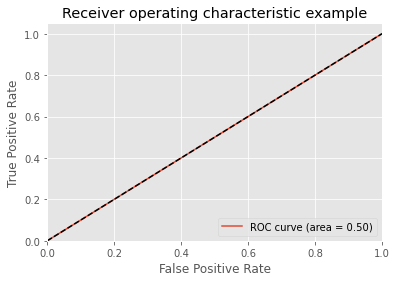

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression - 변수 중요도 확인

In [ ]:
from matplotlib import pyplot

# get importance
importance = Logit.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.52426
Feature: 1, Score: 0.55851
Feature: 2, Score: 0.49189
Feature: 3, Score: 0.59502
Feature: 4, Score: 0.51368
Feature: 5, Score: 0.51211
Feature: 6, Score: 0.45655
Feature: 7, Score: -0.83432
Feature: 8, Score: -1.13216
Feature: 9, Score: -2.44506
Feature: 10, Score: -1.87772
Feature: 11, Score: -0.05980
Feature: 12, Score: -0.05873
Feature: 13, Score: -0.42412
Feature: 14, Score: 0.90925
Feature: 15, Score: -0.34011
Feature: 16, Score: 0.62732
Feature: 17, Score: 1.58788
Feature: 18, Score: 0.00000
Feature: 19, Score: -1.18857
Feature: 20, Score: -0.44817
Feature: 21, Score: -0.91967
Feature: 22, Score: 1.37659
Feature: 23, Score: 3.21675
Feature: 24, Score: -0.51858
Feature: 25, Score: 1.26237
Feature: 26, Score: 4.37515
Feature: 27, Score: 4.39942
Feature: 28, Score: 4.37043
Feature: 29, Score: 4.34977
Feature: 30, Score: 4.31078
Feature: 31, Score: 4.46450
Feature: 32, Score: 4.38260
Feature: 33, Score: 3.72973
Feature: 34, Score: 4.40314
Feature: 35, Score

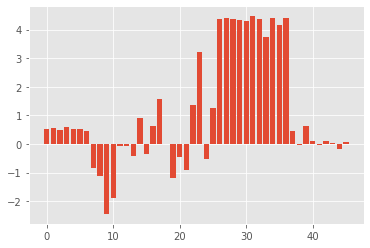

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Decision Tree

In [ ]:
from sklearn import tree
Decision = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10, max_features= 3)
Decision.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=3,
                       random_state=10)

In [ ]:
print("훈련 세트 정확도 : {:.5f}".format(Decision.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.5f}".format(Decision.score(X_test,y_test)))

훈련 세트 정확도 : 0.90092
테스트 세트 정확도 : 0.84818


In [ ]:
y_pred = Decision.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.85


In [ ]:
pred_probs = Decision.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
get_clf_eval(y_test, pred_probs)

오차행렬:
 [[28450    51]
 [ 5045    19]]

정확도: 0.8482
정밀도: 0.2714
재현율: 0.0038
F1: 0.0074
AUC: 0.5010


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

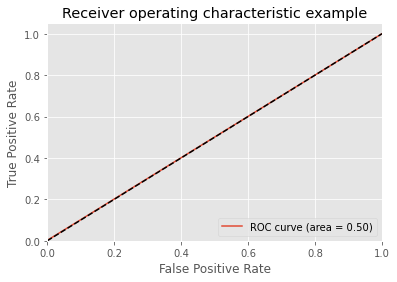

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Decision Tree - 변수 중요도

In [ ]:
# get importance
importance =Decision.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00726
Feature: 1, Score: 0.00711
Feature: 2, Score: 0.00449
Feature: 3, Score: 0.00450
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00244
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00050
Feature: 13, Score: 0.00041
Feature: 14, Score: 0.09423
Feature: 15, Score: 0.00056
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00196
Feature: 23, Score: 0.71792
Feature: 24, Score: 0.00099
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00058
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00088
Fe

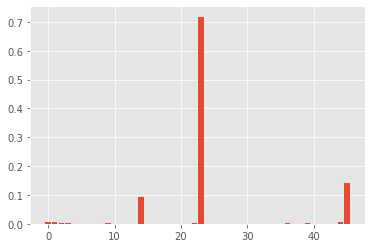

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators=100,random_state=0,
                                max_depth = 5)
forest.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=5, random_state=0)

In [ ]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.895
테스트 세트 정확도 : 0.849


In [ ]:
pred_probs = forest.predict(X_test)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
pred_probs

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
get_clf_eval(y_test, preds)

오차행렬:
 [[28501     0]
 [ 5064     0]]

정확도: 0.8491
정밀도: 0.0000
재현율: 0.0000
F1: 0.0000
AUC: 0.5000


C:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

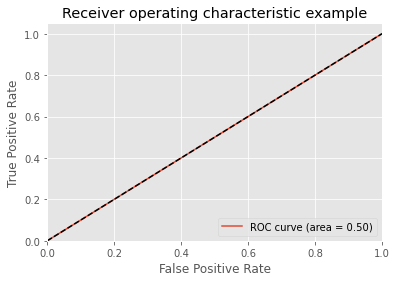

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
def plot_feature_importances_child(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_)
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)


# Random Forest - 특성 중요도

In [ ]:
# get importance
importance = forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00957
Feature: 1, Score: 0.00568
Feature: 2, Score: 0.00236
Feature: 3, Score: 0.00120
Feature: 4, Score: 0.00289
Feature: 5, Score: 0.00428
Feature: 6, Score: 0.00917
Feature: 7, Score: 0.03626
Feature: 8, Score: 0.00003
Feature: 9, Score: 0.00097
Feature: 10, Score: 0.00016
Feature: 11, Score: 0.00001
Feature: 12, Score: 0.00102
Feature: 13, Score: 0.00022
Feature: 14, Score: 0.14024
Feature: 15, Score: 0.01676
Feature: 16, Score: 0.00008
Feature: 17, Score: 0.00040
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00003
Feature: 20, Score: 0.00013
Feature: 21, Score: 0.00042
Feature: 22, Score: 0.05208
Feature: 23, Score: 0.44972
Feature: 24, Score: 0.00030
Feature: 25, Score: 0.00467
Feature: 26, Score: 0.00594
Feature: 27, Score: 0.00166
Feature: 28, Score: 0.01013
Feature: 29, Score: 0.00606
Feature: 30, Score: 0.00922
Feature: 31, Score: 0.00017
Feature: 32, Score: 0.00237
Feature: 33, Score: 0.00004
Feature: 34, Score: 0.00274
Feature: 35, Score: 0.02083
Fe

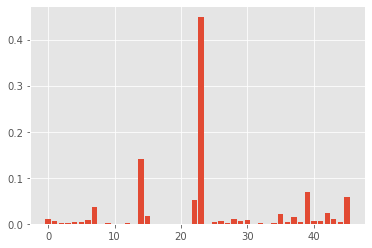

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# XGBOOST

In [ ]:
import xgboost as xgb

epoch = 1000
learning_rate = 0.03
gamma = 0
subsampling = 0.6
max_depth = 5
xgb_model = xgboost.XGBRegressor(n_estimators = 100, learning_rate = learning_rate, 
                                 gamma = gamma, subsampling = subsampling,
                                 colsample_bytree = 1, max_depth = max_depth)

print(X_train.shape, y_train.shape)
xgb_model.fit(X_train, y_train)

(88470, 46) (88470, 1)
[04:27:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { subsampling } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             subsampling=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [ ]:
X_train

,아동_가구소득구분코_100만원이상-150만원미만,아동_가구소득구분코_150만원이상-200만원미만,아동_가구소득구분코_200만원이상-250만원미만,아동_가구소득구분코_250만원이상-300만원미만,아동_가구소득구분코_300만원이상,아동_가구소득구분코_50만원미만,아동_가구소득구분코_50만원이상~100만원미만,신고_접수경로구분코_112,신고_접수경로구분코_119,신고_접수경로구분코_129,...,판단_학대발생빈도_일회성,아동_위험유형06,아동_위험유형07,아동_위험유형08,아동_위험유형04,아동_위험유형05,아동_위험유형01,아동_위험유형09,아동_위험유형02,아동_위험유형03
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88465,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88466,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88467,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params = {'max_depth' : 4,
         'eta' : 0.005, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 ,
         'sub_sample' : 0.3,
         'min_child_weight' : 5,
         'num_boost_around' : 10}

num_rounds = 100

In [ ]:
wlist = [(dtrain, 'train'), (dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[04:29:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { early_stoppings, num_boost_around, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.68966	eval-logloss:0.69015
[1]	train-logloss:0.68621	eval-logloss:0.68720
[2]	train-logloss:0.68273	eval-logloss:0.68430
[3]	train-logloss:0.67939	eval-logloss:0.68141
[4]	train-logloss:0.67602	eval-logloss:0.67855
[5]	train-logloss:0.67268	eval-logloss:0.67570
[6]	train-logloss:0.66938	eval-logloss:0.67290
[7]	train-logloss:0.66610	eval-logloss:0.67016
[8]	train-logloss:0.66288	eval-logloss:0.66738
[9]	train-logloss:0.65966	eval-logloss:0.66468
[10]	train-logloss:0.65650	eval-logloss:0.66200
[11]	train-logloss:0.65337	eval-logloss:0.65934
[12]	train-

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.316 0.316 0.316 0.316 0.316 0.316 0.316 0.377 0.316 0.377]
예측값 10개만 표시:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
get_clf_eval(y_test, preds)

오차행렬:
 [[28297   204]
 [ 4757   307]]

정확도: 0.8522
정밀도: 0.6008
재현율: 0.0606
F1: 0.1101
AUC: 0.5267


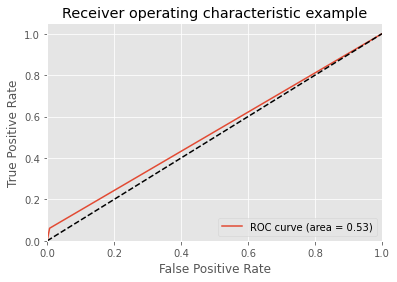

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# XGBOOST - 변수중요도

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-

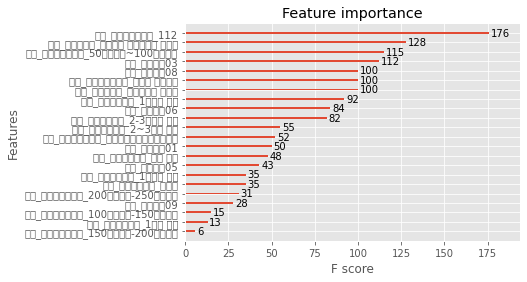

In [ ]:
xgboost.plot_importance(xgb_model)

# SVM

In [ ]:
# 시간걸림
from sklearn import svm

clf = svm.SVC(kernel ='linear',C=1,gamma=0.1)  
# C : 작게하면 train 분류 부정확하지만 margin크게 / 크게하면 margin작게 하지만 train분류 정확
# noise가 많은 데이터라면 C작게, Noise가 별로 없으면 C크게 하는게 좋다
clf.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, gamma=0.1, kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.85


In [ ]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도 : 0.895
테스트 세트 정확도 : 0.849


In [ ]:
get_clf_eval(y_test, y_pred)

오차행렬:
 [[28484    17]
 [ 5057     7]]

정확도: 0.8488
정밀도: 0.2917
재현율: 0.0014
F1: 0.0028
AUC: 0.5004


In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

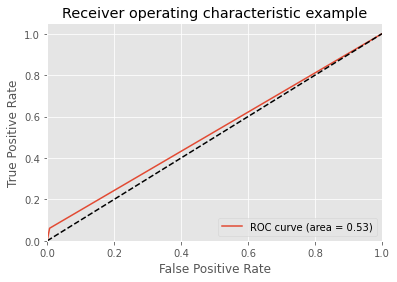

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()